# Ridge Regression
### Lehner White

In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import solve_triangular
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import seaborn

/Users/Lehner/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
class ridge:
    def fit(self, data, labels, lam):
        self.X = np.hstack((np.ones((len(data),1)),data))
        self.Y = labels
        
        lam_mat = np.sqrt(lam)*np.eye(self.X.shape[1])
        lam_mat[0,0] = 0
        X = np.vstack((self.X, lam_mat))
        Y = np.hstack((self.Y, np.zeros(self.X.shape[1])))
        
        U, S, V = np.linalg.svd(X, full_matrices=0)
        S_inv = np.diag(1./S)
        
        self.w = np.dot(V.T, np.dot(S_inv, np.dot(U.T, Y)))
        return
        
    def predict(self, x):
        return self.w.dot(x)
        

In [3]:
dataset = pd.read_csv('CleanedNFLData.csv')
dataset = dataset[['qtr', 'down', 'TimeSecs', 'ydstogo', 'ydsnet', 'GoalToGo', 'ScoreDiff','yardsGained']].dropna()
data = dataset.values
labels = dataset.yardsGained.values

In [4]:
model = ridge()
model2 = linear_model.Ridge()

In [5]:
%%timeit
eps_list = [10**exp for exp in np.arange(-10,11)]
model_w = []
for eps in eps_list:
    model = ridge()
    model.fit(data[:2000], labels[:2000], eps)
    model_w.append(model.w)

100 loops, best of 3: 9.61 ms per loop


In [6]:
%%timeit
eps_list = [10**exp for exp in np.arange(-10,11)]
for eps in eps_list:
    model2 = linear_model.Ridge(alpha=eps)
    model2.fit(data[:2000], labels[:2000])

The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 10.6 ms per loop


In [7]:
test_data, test_label = data[-1], labels[-1]
model = ridge()
model.fit(data[:2000], labels[:2000], 10**10)
model2 = linear_model.Ridge(alpha=10**10)
model2.fit(data[:2000], labels[:2000])

print model2.predict(test_data)[0]
test_data = np.append(np.array([1]), test_data)
print model.predict(test_data)
print test_label

5.46583990499
5.46583990499
0


/Users/Lehner/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


This linear model works much better on other datasets

In [8]:
dataset = datasets.load_diabetes()
data = dataset.data
labels = dataset.target

In [9]:
%%timeit
eps_list = [10**exp for exp in np.arange(-10,11)]
model_w = []
for eps in eps_list:
    model = ridge()
    model.fit(data[:-1], labels[:-1], eps)
    model_w.append(model.w)

100 loops, best of 3: 5.64 ms per loop


In [10]:
%%timeit
eps_list = [10**exp for exp in np.arange(-10,11)]
for eps in eps_list:
    model2 = linear_model.Ridge(alpha=eps)
    model2.fit(data[:-1], labels[:-1])

100 loops, best of 3: 9.31 ms per loop


In [11]:
test_data, test_label = data[-1], labels[-1]
model = ridge()
model.fit(data[:-1], labels[:-1], 10**10)
model2 = linear_model.Ridge(alpha=10**10)
model2.fit(data[:-1], labels[:-1])

print model2.predict(test_data)[0]
test_data = np.append(np.array([1]), test_data)
print model.predict(test_data)
print test_label

152.349206325
152.349206325
57.0


/Users/Lehner/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


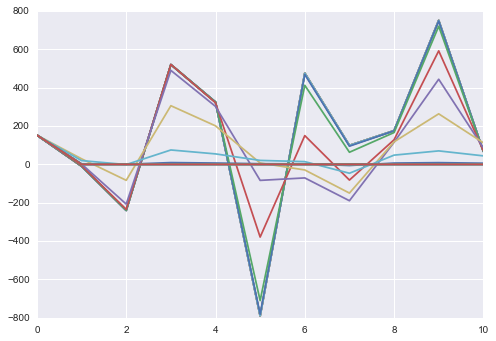

In [12]:
eps_list = [10**exp for exp in np.arange(-10,11)]
model_w = []
for eps in eps_list:
    model = ridge()
    model.fit(data[:-1], labels[:-1], eps)
    model_w.append(model.w)

for w in model_w:
    plt.plot(w)
plt.show()